In [1]:
import pandas as pd #importing necessary libraries 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ingredients = pd.read_csv("D:/Guvi/Capstone/dominos_5/Pizza_ingredients - Pizza_ingredients.csv") #loading necessary datasets
sales=pd.read_csv("D:/Guvi/Capstone/dominos_5/Pizza_Sale - pizza_sales.csv")

In [3]:
ingredients.head()

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0


In [4]:
ingredients.shape

(518, 4)

In [5]:
ingredients.describe()

,Items_Qty_In_Grams
count,514.000000
mean,30.564202
std,30.351623
min,5.000000
25%,10.000000
50%,20.000000
75%,40.000000
max,200.000000


In [6]:
ingredients.isnull().sum()

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64

In [7]:
missing_value_rows = ingredients[ingredients.isna().any(axis=1)]
missing_value_rows

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
24,brie_carre_s,The Brie Carre Pizza,Caramelized Onions,NaN
149,hawaiian_l,The Hawaiian Pizza,Sliced Ham,NaN
152,hawaiian_m,The Hawaiian Pizza,Sliced Ham,NaN
155,hawaiian_s,The Hawaiian Pizza,Sliced Ham,NaN


In [8]:
#fill the null values
ingredients.loc[(ingredients['pizza_ingredients'] == 'Caramelized Onions') & (ingredients['Items_Qty_In_Grams'].isnull()), 'Items_Qty_In_Grams'] = 20.0
ingredients.loc[(ingredients['pizza_name_id'] == 'hawaiian_l') & (ingredients['Items_Qty_In_Grams'].isnull()), 'Items_Qty_In_Grams'] = 60.0
ingredients.loc[(ingredients['pizza_name_id'] == 'hawaiian_m') & (ingredients['Items_Qty_In_Grams'].isnull()), 'Items_Qty_In_Grams'] = 40.0
ingredients.loc[(ingredients['pizza_name_id'] == 'hawaiian_s') & (ingredients['Items_Qty_In_Grams'].isnull()), 'Items_Qty_In_Grams'] = 20.0

In [9]:
ingredients.isnull().sum()

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    0
dtype: int64

In [10]:
unique_count = ingredients.nunique()
unique_count

pizza_name_id         91
pizza_name            32
pizza_ingredients     64
Items_Qty_In_Grams    17
dtype: int64

In [11]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  518 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB


In [12]:
ingredients.Items_Qty_In_Grams = ingredients.Items_Qty_In_Grams.astype(int)

In [13]:
ingredients.pizza_ingredients = ingredients.pizza_ingredients.replace({'Barbecued Chicken': "Barbecue Chicken", '?duja Salami': "nduja Salami"})

In [14]:
sales.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [15]:
sales.shape

(48620, 12)

In [17]:
sales.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48613.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821494
std,14035.529381,6180.119770,0.143077,3.621789,4.437520
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [18]:
# Display count of unique values in each column
unique_count = sales.nunique()
unique_count

pizza_id             48620
order_id             21350
pizza_name_id           91
quantity                 4
order_date             358
order_time           16382
unit_price              25
total_price             56
pizza_size               5
pizza_category           4
pizza_ingredients       32
pizza_name              32
dtype: int64

In [19]:
sales.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

In [20]:
sales.duplicated().sum()

0

In [26]:
# Fill `total_price` where it is null with `quantity * unit_price`
sales['total_price'] = sales['total_price'].interpolate(method='linear') #null value imputing using interpolate method

In [22]:
# <!-- Fill pizza_category where it is null with Veggie, Classic, Chicken and Supreme -->
sales.loc[(sales['pizza_name'] == 'The Five Cheese Pizza') & (sales['pizza_category'].isnull()), 'pizza_category'] = 'Veggie'
sales.loc[(sales['pizza_name'] == 'The Mexicana Pizza') & (sales['pizza_category'].isnull()), 'pizza_category'] = 'Veggie'
sales.loc[(sales['pizza_name'] == 'The Spinach Pesto Pizza') & (sales['pizza_category'].isnull()), 'pizza_category'] = 'Veggie'
sales.loc[(sales['pizza_name'] == 'The Spinach and Feta Pizza') & (sales['pizza_category'].isnull()), 'pizza_category'] = 'Veggie'
sales.loc[(sales['pizza_name'] == 'The Greek Pizza') & (sales['pizza_category'].isnull()), 'pizza_category'] = 'Classic'
sales.loc[(sales['pizza_name'] == 'The Napolitana Pizza') & (sales['pizza_category'].isnull()), 'pizza_category'] = 'Classic'
sales.loc[(sales['pizza_name'] == 'The Pepperoni Pizza') & (sales['pizza_category'].isnull()), 'pizza_category'] = 'Classic'
sales.loc[(sales['pizza_name'] == 'The Hawaiian Pizza') & (sales['pizza_category'].isnull()), 'pizza_category'] = 'Classic'
sales.loc[(sales['pizza_name'] == 'The Italian Capocollo Pizza') & (sales['pizza_category'].isnull()), 'pizza_category'] = 'Classic'
sales.loc[(sales['pizza_name'] == 'The Barbecue Chicken Pizza') & (sales['pizza_category'].isnull()), 'pizza_category'] = 'Chicken'
sales.loc[(sales['pizza_name'] == 'The Chicken Alfredo Pizza') & (sales['pizza_category'].isnull()), 'pizza_category'] = 'Chicken'
sales.loc[(sales['pizza_name'] == 'The Prosciutto and Arugula Pizza') & (sales['pizza_category'].isnull()), 'pizza_category'] = 'Supreme'
sales.loc[(sales['pizza_name'] == 'The Brie Carre Pizza') & (sales['pizza_category'].isnull()), 'pizza_category'] = 'Supreme'
sales.loc[(sales['pizza_name'] == 'The Pepper Salami Pizza') & (sales['pizza_category'].isnull()), 'pizza_category'] = 'Supreme'
sales.loc[(sales['pizza_name'] == 'The Sicilian Pizza') & (sales['pizza_category'].isnull()), 'pizza_category'] = 'Supreme'
sales.loc[(sales['pizza_name'] == 'The Spicy Italian Pizza') & (sales['pizza_category'].isnull()), 'pizza_category'] = 'Supreme'

In [23]:
# Fill null values in `pizza_name` based on `pizza_name_id`
sales.loc[(sales['pizza_name_id'].isin(['pepperoni_l', 'pepperoni_s'])) & (sales['pizza_name'].isnull()), 'pizza_name'] = 'The Pepperoni Pizza'
sales.loc[(sales['pizza_name_id'] == 'hawaiian_s') & (sales['pizza_name'].isnull()), 'pizza_name'] = 'The Hawaiian Pizza'
sales.loc[(sales['pizza_name_id'] == 'big_meat_s') & (sales['pizza_name'].isnull()), 'pizza_name'] = 'The Big Meat Pizza'
sales.loc[(sales['pizza_name_id'] == 'spicy_ital_m') & (sales['pizza_name'].isnull()), 'pizza_name'] = 'The Spicy Italian Pizza'
sales.loc[(sales['pizza_name_id'] == 'sicilian_s') & (sales['pizza_name'].isnull()), 'pizza_name'] = 'The Sicilian Pizza'
sales.loc[(sales['pizza_name_id'] == 'mexicana_l') & (sales['pizza_name'].isnull()), 'pizza_name'] = 'The Mexicana Pizza'

In [24]:
# Filling null values in 'pizza_ingredients' based on 'pizza_name'
sales.loc[(sales['pizza_name'] == 'The Five Cheese Pizza') & (sales['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic'
sales.loc[(sales['pizza_name'] == 'The Four Cheese Pizza') & (sales['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Ricotta Cheese, Gorgonzola Piccante Cheese, Mozzarella Cheese, Parmigiano Reggiano Cheese, Garlic'
sales.loc[(sales['pizza_name'] == 'The Green Garden Pizza') & (sales['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Spinach, Mushrooms, Tomatoes, Green Olives, Feta Cheese'
sales.loc[(sales['pizza_name'] == 'The Hawaiian Pizza') & (sales['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Sliced Ham, Pineapple, Mozzarella Cheese'
sales.loc[(sales['pizza_name'] == 'The California Chicken Pizza') & (sales['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Chicken, Artichokes, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese'
sales.loc[(sales['pizza_name'] == 'The Southwest Chicken Pizza') & (sales['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce'
sales.loc[(sales['pizza_name'] == 'The Chicken Alfredo Pizza') & (sales['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Chicken, Red Onions, Red Peppers, Mushrooms, Asiago Cheese, Alfredo Sauce'
sales.loc[(sales['pizza_name'] == 'The Spinach and Feta Pizza') & (sales['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Spinach, Mushrooms, Red Onions, Feta Cheese, Garlic'
sales.loc[(sales['pizza_name'] == 'The Prosciutto and Arugula Pizza') & (sales['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Prosciutto di San Daniele, Arugula, Mozzarella Cheese'
sales.loc[(sales['pizza_name'] == 'The Pepperoni, Mushroom, and Peppers Pizza') & (sales['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Pepperoni, Mushrooms, Green Peppers'
sales.loc[(sales['pizza_name'] == 'The Italian Vegetables Pizza') & (sales['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Eggplant, Artichokes, Tomatoes, Zucchini, Red Peppers, Garlic, Pesto Sauce'

In [25]:
# Filling null values in 'pizza_name_id' based on 'pizza_name'
sales.loc[(sales['pizza_name'] == 'The Five Cheese Pizza') & (sales['pizza_size'] == 'L') & (sales['pizza_name_id'].isnull()), 'pizza_name_id'] = 'five_cheese_l'
sales.loc[(sales['pizza_name'] == 'The Soppressata Pizza') & (sales['pizza_size'] == 'L') & (sales['pizza_name_id'].isnull()), 'pizza_name_id'] = 'soppressata_l'
sales.loc[(sales['pizza_name'] == 'The Greek Pizza') & (sales['pizza_size'] == 'S') & (sales['pizza_name_id'].isnull()), 'pizza_name_id'] = 'the_greek_s'
sales.loc[(sales['pizza_name'] == 'The Four Cheese Pizza') & (sales['pizza_size'] == 'L') & (sales['pizza_name_id'].isnull()), 'pizza_name_id'] = 'four_cheese_l'
sales.loc[(sales['pizza_name'] == 'The Napolitana Pizza') & (sales['pizza_size'] == 'S') & (sales['pizza_name_id'].isnull()), 'pizza_name_id'] = 'napolitana_s'
sales.loc[(sales['pizza_name'] == 'The Thai Chicken Pizza') & (sales['pizza_size'] == 'L') & (sales['pizza_name_id'].isnull()), 'pizza_name_id'] = 'thai_ckn_l'
sales.loc[(sales['pizza_name'] == 'The Green Garden Pizza') & (sales['pizza_size'] == 'S') & (sales['pizza_name_id'].isnull()), 'pizza_name_id'] = 'green_garden_s'
sales.loc[(sales['pizza_name'] == 'The Spinach Supreme Pizza') & (sales['pizza_size'] == 'S') & (sales['pizza_name_id'].isnull()), 'pizza_name_id'] = 'spinach_supr_s'
sales.loc[(sales['pizza_name'] == 'The Pepperoni Pizza') & (sales['pizza_size'] == 'S') & (sales['pizza_name_id'].isnull()), 'pizza_name_id'] = 'pepperoni_s'
sales.loc[(sales['pizza_name'] == 'The Barbecue Chicken Pizza') & (sales['pizza_size'] == 'L') & (sales['pizza_name_id'].isnull()), 'pizza_name_id'] = 'bbq_ckn_l'
sales.loc[(sales['pizza_name'] == 'The Hawaiian Pizza') & (sales['pizza_size'] == 'L') & (sales['pizza_name_id'].isnull()), 'pizza_name_id'] = 'hawaiian_l'
sales.loc[(sales['pizza_name'] == 'The Italian Supreme Pizza') & (sales['pizza_size'] == 'L') & (sales['pizza_name_id'].isnull()), 'pizza_name_id'] = 'ital_supr_l'
sales.loc[(sales['pizza_name'] == 'The California Chicken Pizza') & (sales['pizza_size'] == 'L') & (sales['pizza_name_id'].isnull()), 'pizza_name_id'] = 'cali_ckn_l'
sales.loc[(sales['pizza_name'] == 'The Pepper Salami Pizza') & (sales['pizza_size'] == 'M') & (sales['pizza_name_id'].isnull()), 'pizza_name_id'] = 'peppr_salami_m'

In [27]:
sales.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [28]:
sales['pizza_category'].value_counts()

pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

In [29]:
sales['pizza_name_id'].value_counts()

pizza_name_id
big_meat_s        1811
thai_ckn_l        1365
five_cheese_l     1359
four_cheese_l     1273
classic_dlx_m     1159
                  ... 
mexicana_s         160
calabrese_s         99
ckn_alfredo_s       96
green_garden_l      94
the_greek_xxl       28
Name: count, Length: 91, dtype: int64

In [30]:
sales.pizza_ingredients = sales.pizza_ingredients.replace({
    'Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce': "Barbecue Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce",
    'Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese': "Chicken, Artichokes, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese",
    '?duja Salami, Pancetta, Tomatoes, Red Onions, Friggitello Peppers, Garlic': "nduja Salami, Pancetta, Tomatoes, Red Onions, Friggitello Peppers, Garlic"})

In [31]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [32]:
sales.shape

(48620, 12)

In [33]:
sales.duplicated().sum()

0

In [40]:
#Feature Engineering
def parse_dates(date):
  for fmt in ('%d-%m-%Y', '%d/%m/%Y', '%Y-%m-%d %H:%M:%S'): # %Y-%m-%d %H:%M:%S
    try:
      return pd.to_datetime(date, format=fmt)
    except ValueError:
      pass
  raise ValueError(f'no valid date format found for {date}')

sales['order_date'] = sales['order_date'].apply(parse_dates)

# Function to convert time from 24-hour to 12-hour format "order_time" column.
from datetime import datetime

def convert_to_12_hour_format(time_obj):  # Convert the time object to a string in the format '%H:%M:%S' if it's not already a string
    time_string = time_obj.strftime('%H:%M:%S')  # Parse the time string and convert to 12-hour format with AM/PM
    return datetime.strptime(time_string, '%H:%M:%S').strftime('%I:%M:%S %p')

# Convert the 'order_time' column to 12-hour format
sales['order_time'] = sales['order_time'].apply(convert_to_12_hour_format)

# Display the updated DataFrame to verify changes
sales
#sales['order_hour'] = sales['order_time'].dt.hour
#def get_time_of_day(order_hour):
#       if 6 <= order_hour < 12:
#           return 'morning'
#       elif 12 <= order_hour < 18:
#           return 'afternoon'
#       else:
#           return 'evening'
# Define seasons
#def get_season(month):
#    if month in [12, 1, 2]:
#        return 'Winter'
#    elif month in [3, 4, 5]:
#        return 'Spring'
#    elif month in [6, 7, 8]:
#        return 'Summer'
#    elif month in [9, 10, 11]:
#        return 'Fall'

#sales['time_of_day'] = sales['order_hour'].apply(get_time_of_day)
#sales['day'] = sales['order_time'].dt.day
#sales['day_of_week'] = sales['order_date'].dt.dayofweek #0 - Monday, 6 - Sunday
#sales['Month'] = sales['order_date'].dt.month
#sales['season'] = sales['order_date'].dt.month.apply(get_season)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_hour,time_of_day,day_of_week,Month,season
0,1,1,hawaiian_m,1,2015-01-01,11:38:36 AM,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,11,morning,3,1,Winter
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40 AM,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,11,morning,3,1,Winter
2,3,2,five_cheese_l,1,2015-01-01,11:57:40 AM,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,11,morning,3,1,Winter
3,4,2,ital_supr_l,1,2015-01-01,11:57:40 AM,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,11,morning,3,1,Winter
4,5,2,mexicana_m,1,2015-01-01,11:57:40 AM,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,11,morning,3,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,09:23:10 PM,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,21,evening,3,12,Winter
48616,48617,21348,four_cheese_l,1,2015-12-31,09:23:10 PM,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,21,evening,3,12,Winter
48617,48618,21348,napolitana_s,1,2015-12-31,09:23:10 PM,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,21,evening,3,12,Winter
48618,48619,21349,mexicana_l,1,2015-12-31,10:09:54 PM,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,22,evening,3,12,Winter


In [41]:
#merging the dataset 
merged_df = pd.merge(sales, ingredients, left_on=['pizza_name_id', 'pizza_name'], right_on=['pizza_name_id', 'pizza_name'], how='inner')

In [42]:
merged_df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients_x,pizza_name,order_hour,time_of_day,day_of_week,Month,season,pizza_ingredients_y,Items_Qty_In_Grams
0,1,1,hawaiian_m,1,2015-01-01,11:38:36 AM,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,11,morning,3,1,Winter,Sliced Ham,40
1,1,1,hawaiian_m,1,2015-01-01,11:38:36 AM,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,11,morning,3,1,Winter,Pineapple,30
2,1,1,hawaiian_m,1,2015-01-01,11:38:36 AM,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,11,morning,3,1,Winter,Mozzarella Cheese,20
3,179,77,hawaiian_m,1,2015-02-01,12:22:46 PM,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,12,afternoon,6,2,Winter,Sliced Ham,40
4,179,77,hawaiian_m,1,2015-02-01,12:22:46 PM,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,12,afternoon,6,2,Winter,Pineapple,30


In [43]:
merged_df.shape

(267576, 19)

In [44]:
merged_df.isnull().sum()

pizza_id               0
order_id               0
pizza_name_id          0
quantity               0
order_date             0
order_time             0
unit_price             0
total_price            0
pizza_size             0
pizza_category         0
pizza_ingredients_x    0
pizza_name             0
order_hour             0
time_of_day            0
day_of_week            0
Month                  0
season                 0
pizza_ingredients_y    0
Items_Qty_In_Grams     0
dtype: int64

In [45]:
merged_df[['pizza_ingredients_x','pizza_ingredients_y']]

,pizza_ingredients_x,pizza_ingredients_y
0,"Sliced Ham, Pineapple, Mozzarella Cheese",Sliced Ham
1,"Sliced Ham, Pineapple, Mozzarella Cheese",Pineapple
2,"Sliced Ham, Pineapple, Mozzarella Cheese",Mozzarella Cheese
3,"Sliced Ham, Pineapple, Mozzarella Cheese",Sliced Ham
4,"Sliced Ham, Pineapple, Mozzarella Cheese",Pineapple
...,...,...
267571,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",Feta Cheese
267572,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",Tomatoes
267573,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",Garlic
267574,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",Beef Chuck Roast


In [46]:
merged_df.drop('pizza_ingredients_y', axis=1, inplace=True)
merged_df = merged_df.rename(columns={"pizza_ingredients_x": "pizza_ingredients"})
merged_df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_hour,time_of_day,day_of_week,Month,season,Items_Qty_In_Grams
0,1,1,hawaiian_m,1,2015-01-01,11:38:36 AM,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,11,morning,3,1,Winter,40
1,1,1,hawaiian_m,1,2015-01-01,11:38:36 AM,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,11,morning,3,1,Winter,30
2,1,1,hawaiian_m,1,2015-01-01,11:38:36 AM,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,11,morning,3,1,Winter,20
3,179,77,hawaiian_m,1,2015-02-01,12:22:46 PM,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,12,afternoon,6,2,Winter,40
4,179,77,hawaiian_m,1,2015-02-01,12:22:46 PM,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,12,afternoon,6,2,Winter,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267571,47490,20866,the_greek_xxl,1,2015-12-20,07:16:20 PM,35.95,35.95,XXL,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza,19,evening,6,12,Winter,80
267572,47490,20866,the_greek_xxl,1,2015-12-20,07:16:20 PM,35.95,35.95,XXL,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza,19,evening,6,12,Winter,50
267573,47490,20866,the_greek_xxl,1,2015-12-20,07:16:20 PM,35.95,35.95,XXL,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza,19,evening,6,12,Winter,25
267574,47490,20866,the_greek_xxl,1,2015-12-20,07:16:20 PM,35.95,35.95,XXL,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza,19,evening,6,12,Winter,200


In [47]:
merged_df.duplicated().sum()

80205

In [48]:
merged_df1 = merged_df.copy()

In [49]:
# Droping duplicate rows from the dataset
pizza = merged_df.drop_duplicates()
pizza.duplicated().sum()

0

In [50]:
#check the mean, median, mode, std and var 
#here I check numerical columns like continuous dataset 
stats = {'mean': [pizza['unit_price'].mean(), pizza['total_price'].mean(), pizza['quantity'].mean()],
         'median': [pizza['unit_price'].median(), pizza['total_price'].median(), pizza['quantity'].median()],
         'mode': [pizza['unit_price'].mode()[0], pizza['total_price'].mode()[0], pizza['quantity'].mode()[0]],
         'std': [pizza['unit_price'].std(), pizza['total_price'].std(), pizza['quantity'].std()],
         'var': [pizza['unit_price'].var(), pizza['total_price'].var(), pizza['quantity'].var()]
        }
#view in df
compare = pd.DataFrame(stats, index = ['unit_price', 'total_price', 'quantity'])
compare
#here in total_price, mean is more than median i.e. right skewed distribution

,mean,median,mode,std,var
unit_price,16.914408,16.75,20.75,3.571439,12.755176
total_price,17.244915,16.75,20.75,4.419968,19.536117
quantity,1.019251,1.00,1.00,0.141575,0.020044


In [53]:
#removing outliers using IQR (INTERQUANTILE RANGE)
def remove_outliers(pizza):
    for col in pizza[['quantity', 'unit_price', 'total_price']]:
        Q1 = pizza[col].quantile(0.15)
        Q3 = pizza[col].quantile(0.85)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the data to remove outliers
        pizza = pizza[(pizza[col] >= lower_bound) & (pizza[col] <= upper_bound)]
    print("Data after removing outliers:\n", pizza.describe())
    return pizza

In [54]:
df = remove_outliers(pizza)

Data after removing outliers:
             pizza_id       order_id  quantity                     order_date  \
count  183722.000000  183722.000000  183722.0                         183722   
mean    24311.794679   10701.946991       1.0  2015-06-28 21:30:52.063443712   
min         1.000000       1.000000       1.0            2015-01-01 00:00:00   
25%     12154.000000    5337.000000       1.0            2015-03-30 00:00:00   
50%     24271.500000   10664.000000       1.0            2015-06-28 00:00:00   
75%     36490.000000   16110.000000       1.0            2015-09-29 00:00:00   
max     48620.000000   21350.000000       1.0            2015-12-31 00:00:00   
std     14040.500364    6182.257661       0.0                            NaN   

          unit_price    total_price     order_hour    day_of_week  \
count  183722.000000  183722.000000  183722.000000  183722.000000   
mean       16.894623      16.894623      15.939817       3.001671   
min         9.750000       9.750000      

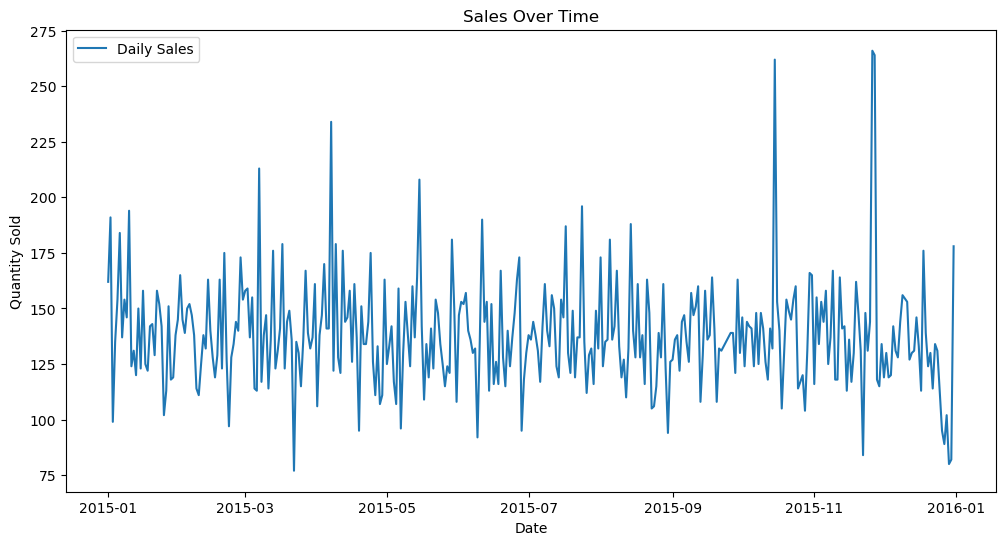


Time Series Analysis of Sales Over Time:
 - Total number of sales records: 358
 - Sales peaks around certain dates, which could indicate promotions or seasonal trends.
 - There is significant volatility in daily sales.


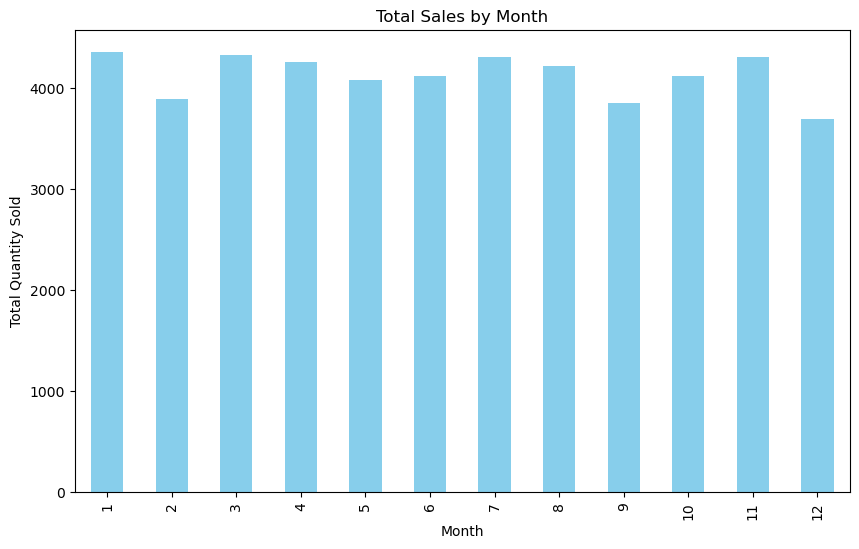


Monthly Sales Trend:
 - The highest sales occurred in month 1 with 4361 units sold.
 - The lowest sales occurred in month 12 with 3696 units sold.
 - There is no strong seasonal pattern in sales.

Sales Trend by Hour of Day:


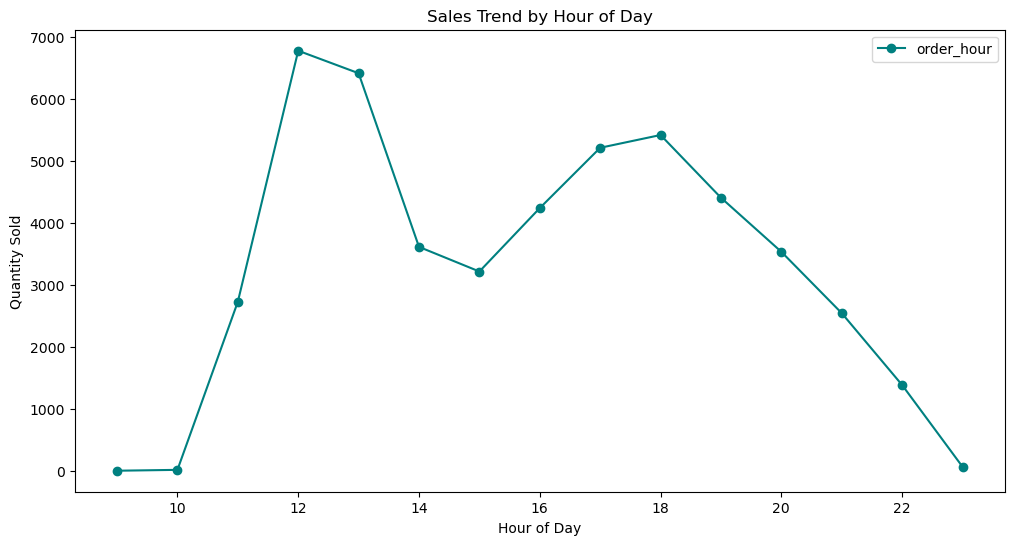


Sales Trend by Hour of Day Analysis:
 - Sales vary significantly by hour of the day, with peak hours showing higher quantities sold.
 - The highest sales occur at hour 12 with 6776 units sold.
 - The lowest sales occur at hour 9 with 4 units sold.
 - This pattern can help in optimizing staffing and inventory levels based on expected sales.

Heatmap of Average Sales by Hour and Day:


C:\Users\Madhava\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


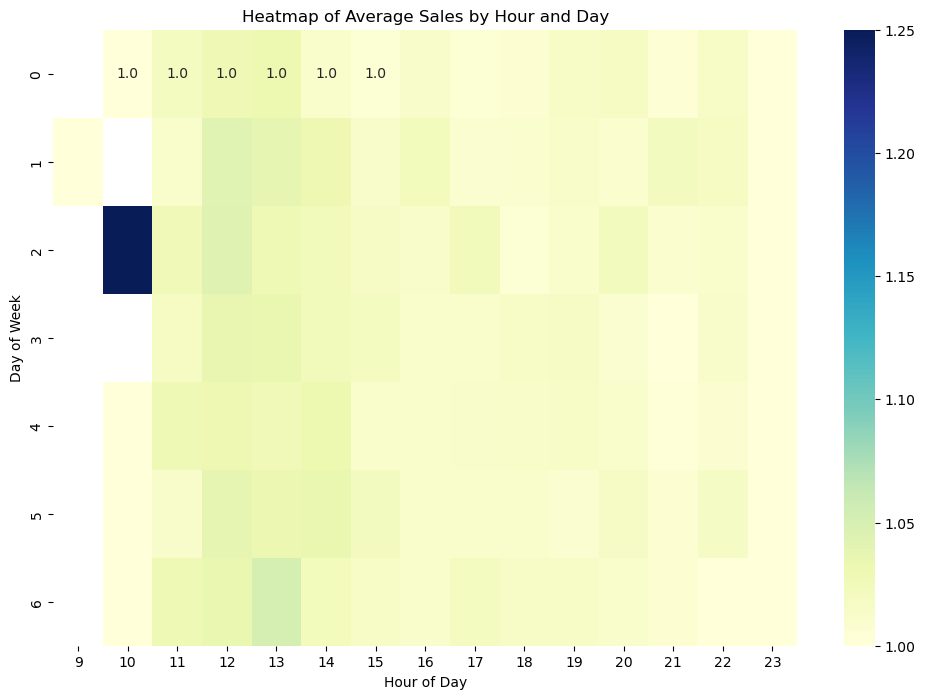


Heatmap of Average Sales by Hour and Day Analysis:
 - The heatmap shows how average sales vary across different days of the week and hours of the day.
 - Peak sales hours and days are indicated by darker colors.
 - This visualization helps identify optimal times for promotions and staffing.

Impact of Season:
season
Fall      0.248013
Spring    0.255658
Summer    0.255275
Winter    0.241054
Name: quantity, dtype: float64
 - The highest sales occurred in month Spring with 0.25565820793157706 units sold.
 - The lowest sales occurred in month Winter with 0.24105377819018034 units sold.
 - There is no strong seasonal pattern in sales.


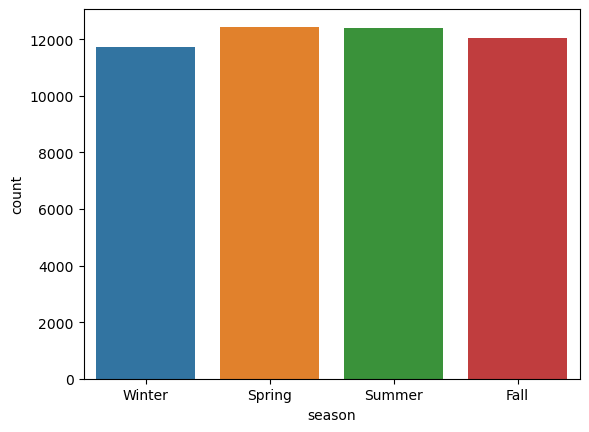

In [55]:
#eda
# Plot sales over time
sales_by_date = sales.groupby('order_date')['quantity'].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date, label='Daily Sales')
plt.title("Sales Over Time")
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.show()
print("\nTime Series Analysis of Sales Over Time:")
print(f" - Total number of sales records: {len(sales_by_date)}")
print(f" - Sales peaks around certain dates, which could indicate promotions or seasonal trends.")
print(f" - There {'is' if sales_by_date.diff().std() > 10 else 'is no'} significant volatility in daily sales.")

# Monthly sales trends
sales['Month'] = sales['order_date'].dt.month
monthly_sales = sales.groupby('Month')['quantity'].sum() # Changed df to sales

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.show()
print("\nMonthly Sales Trend:")
print(f" - The highest sales occurred in month {monthly_sales.idxmax()} with {monthly_sales.max()} units sold.")
print(f" - The lowest sales occurred in month {monthly_sales.idxmin()} with {monthly_sales.min()} units sold.")
print(f" - There is {'clear monthly' if monthly_sales.max() > 1.5 * monthly_sales.mean() else 'no strong seasonal pattern'} in sales.")
# Sales Trend by Hour of Day
print("\nSales Trend by Hour of Day:")
plt.figure(figsize=(12, 6))
sales_by_hour = sales.groupby('order_hour')['quantity'].sum()
plt.plot(sales_by_hour, label='order_hour', marker='o', color='teal')
plt.title('Sales Trend by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Quantity Sold')
plt.legend()
plt.show()

print("\nSales Trend by Hour of Day Analysis:")
print(f" - Sales vary significantly by hour of the day, with peak hours showing higher quantities sold.")
print(f" - The highest sales occur at hour {sales_by_hour.idxmax()} with {sales_by_hour.max()} units sold.")
print(f" - The lowest sales occur at hour {sales_by_hour.idxmin()} with {sales_by_hour.min()} units sold.")
print(f" - This pattern can help in optimizing staffing and inventory levels based on expected sales.")

# Heatmap of Average Sales by Hour and Day
print("\nHeatmap of Average Sales by Hour and Day:")
plt.figure(figsize=(12, 8))
heatmap_data = sales.groupby(['day_of_week', 'order_hour'])['quantity'].mean().unstack()
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Heatmap of Average Sales by Hour and Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

print("\nHeatmap of Average Sales by Hour and Day Analysis:")
print(f" - The heatmap shows how average sales vary across different days of the week and hours of the day.")
print(f" - Peak sales hours and days are indicated by darker colors.")
print(f" - This visualization helps identify optimal times for promotions and staffing.")
#season
season_impact = sales.groupby('season')['quantity'].sum() / sales['quantity'].sum()
sns.countplot(x='season', data=sales)
print(f"\nImpact of Season:\n{season_impact}") 
print(f" - The highest sales occurred in month {season_impact.idxmax()} with {season_impact.max()} units sold.")
print(f" - The lowest sales occurred in month {season_impact.idxmin()} with {season_impact.min()} units sold.")
print(f" - There is {'clear seasonality' if season_impact.max() > 1.5 * season_impact.mean() else 'no strong seasonal pattern'} in sales.")

In [56]:
#prophet model
# Import necessary libraries and suppress warnings
from prophet import Prophet
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")
# Prepare weekly aggregated sales data
# Data Preparation - Aggregate pizza sales by week and pizza type
def prepare_weekly_sales(df):
    # Ensure 'order_date' column exists and convert to datetime
    if 'order_date' not in df.columns:
        raise ValueError("The 'order_date' column is missing in the dataset.")
    if 'pizza_name_id' not in df.columns:
        raise ValueError("The 'pizza_name_id' column is missing in the dataset.")
    
    df['order_date'] = pd.to_datetime(df['order_date'])
    df['week'] = df['order_date'].dt.to_period('W').apply(lambda r: r.start_time)
    
    # Aggregate weekly sales by pizza type
    weekly_sales = df.groupby(['week', 'pizza_name_id'])['quantity'].sum().reset_index()
    weekly_sales.rename(columns={'week': 'ds', 'quantity': 'y'}, inplace=True)  # Prophet format
    return weekly_sales

# Step 4: Apply the function to prepare weekly sales data
# Call the function with the correct DataFrame
pizza_sales_weekly = prepare_weekly_sales(pizza)

In [57]:
# Define a function to train models for each pizza type
from sklearn.metrics import mean_absolute_percentage_error as mape

def train_models_for_all_pizzas(pizza_sales_weekly):
    pizza_models = {}
    pizza_forecasts = {}
    pizza_mape_scores = []

    for pizza_id in pizza_sales_weekly['pizza_name_id'].unique():
        # Filter the sales data for this specific pizza
        pizza_data = pizza_sales_weekly[pizza_sales_weekly['pizza_name_id'] == pizza_id]

        # Split the data into training and testing sets
        train_size = int(0.8 * len(pizza_data))
        train, test = pizza_data[:train_size], pizza_data[train_size:]

        # Train Prophet model
        model = Prophet()
        model.fit(train)

        # Make predictions for the test period
        future = model.make_future_dataframe(periods=len(test), freq='W')
        forecast = model.predict(future)

        # Extract predicted values for test period
        predictions = forecast['yhat'][-len(test):].values

        # Calculate MAPE score for model performance
        prophet_mape = mape(test['y'], predictions)
        pizza_mape_scores.append({'pizza_name_id': pizza_id, 'mape': prophet_mape})
        pizza_models[pizza_id] = model  # Save model for later use

        # Save forecasted values
        pizza_forecasts[pizza_id] = forecast[['ds', 'yhat']].tail(len(test)).reset_index(drop=True)

    # Combine all forecasts into a single DataFrame
    all_forecasts = pd.concat([pd.DataFrame({'pizza_name_id': pizza_id, 'ds': pizza_forecasts[pizza_id]['ds'], 'yhat': pizza_forecasts[pizza_id]['yhat']}) 
                                for pizza_id in pizza_forecasts], ignore_index=True)
    
    return pizza_models, pizza_mape_scores, all_forecasts
# Train the models

# Train the models and get MAPE scores along with all_forecasts
pizza_models, pizza_mape_scores, all_forecasts = train_models_for_all_pizzas(pizza_sales_weekly)

16:04:01 - cmdstanpy - INFO - Chain [1] start processing
16:04:02 - cmdstanpy - INFO - Chain [1] done processing
16:04:02 - cmdstanpy - INFO - Chain [1] start processing
16:04:02 - cmdstanpy - INFO - Chain [1] done processing
16:04:02 - cmdstanpy - INFO - Chain [1] start processing
16:04:02 - cmdstanpy - INFO - Chain [1] done processing
16:04:03 - cmdstanpy - INFO - Chain [1] start processing
16:04:03 - cmdstanpy - INFO - Chain [1] done processing
16:04:03 - cmdstanpy - INFO - Chain [1] start processing
16:04:03 - cmdstanpy - INFO - Chain [1] done processing
16:04:03 - cmdstanpy - INFO - Chain [1] start processing
16:04:03 - cmdstanpy - INFO - Chain [1] done processing
16:04:03 - cmdstanpy - INFO - Chain [1] start processing
16:04:04 - cmdstanpy - INFO - Chain [1] done processing
16:04:04 - cmdstanpy - INFO - Chain [1] start processing
16:04:04 - cmdstanpy - INFO - Chain [1] done processing
16:04:04 - cmdstanpy - INFO - Chain [1] start processing
16:04:04 - cmdstanpy - INFO - Chain [1]

In [58]:
# Save trained models to a pickle file

import pickle

# Save the trained models to a pickle file
with open('trained_dominos_pizza_models.pkl', 'wb') as f:
    pickle.dump(pizza_models, f)
print("Trained pizza models saved to trained_dominos_pizza_models.pkl")

# Print the MAPE score for each pizza

for item in pizza_mape_scores: # Print MAPE for each pizza type
    print(f'Pizza {item["pizza_name_id"]}: MAPE = {item["mape"]:.2f}')
	
# Save MAPE scores to a CSV file

# Convert the list of MAPE scores to a DataFrame
pizza_mape_df = pd.DataFrame(pizza_mape_scores)

# Save the DataFrame to a CSV file
pizza_mape_df.to_csv('pizza_mape_scores.csv', index=False)
print("Model performance metrics saved to pizza_mape_scores.csv")

Trained pizza models saved to trained_dominos_pizza_models.pkl
Pizza bbq_ckn_l: MAPE = 0.36
Pizza bbq_ckn_m: MAPE = 0.52
Pizza bbq_ckn_s: MAPE = 0.32
Pizza big_meat_s: MAPE = 0.29
Pizza brie_carre_s: MAPE = 0.40
Pizza calabrese_l: MAPE = 0.41
Pizza calabrese_m: MAPE = 0.55
Pizza cali_ckn_l: MAPE = 0.47
Pizza cali_ckn_m: MAPE = 0.23
Pizza cali_ckn_s: MAPE = 0.47
Pizza ckn_alfredo_l: MAPE = 0.73
Pizza ckn_alfredo_m: MAPE = 0.30
Pizza ckn_alfredo_s: MAPE = 0.64
Pizza ckn_pesto_l: MAPE = 0.85
Pizza ckn_pesto_m: MAPE = 0.47
Pizza ckn_pesto_s: MAPE = 0.49
Pizza classic_dlx_l: MAPE = 0.19
Pizza classic_dlx_m: MAPE = 0.20
Pizza classic_dlx_s: MAPE = 0.35
Pizza five_cheese_l: MAPE = 0.29
Pizza four_cheese_l: MAPE = 0.28
Pizza four_cheese_m: MAPE = 0.52
Pizza green_garden_l: MAPE = 0.55
Pizza green_garden_m: MAPE = 0.57
Pizza green_garden_s: MAPE = 0.40
Pizza hawaiian_l: MAPE = 0.32
Pizza hawaiian_m: MAPE = 0.70
Pizza hawaiian_s: MAPE = 0.28
Pizza ital_cpcllo_l: MAPE = 0.77
Pizza ital_cpcllo_m: 

In [59]:
#ingredient calculation

# Merge forecasted sales with ingredient requirements
ingredient_demand = pd.merge(
    all_forecasts,  # this is the DataFrame containing forecasted sales for each pizza
    pizza, 
    on='pizza_name_id', 
    how='inner')

# Calculate the total ingredient requirement based on predicted pizza sales
ingredient_demand['total_ingredient_quantity'] = (
    ingredient_demand['yhat'] * ingredient_demand['quantity'])

# Display the updated DataFrame with total ingredient quantities
ingredient_demand.head()

,pizza_name_id,ds,yhat,pizza_id,order_id,quantity,order_date,order_time,unit_price,total_price,...,pizza_ingredients,pizza_name,order_hour,time_of_day,day_of_week,Month,season,Items_Qty_In_Grams,week,total_ingredient_quantity
0,bbq_ckn_l,2015-10-18,83.502439,26,11,1,2015-01-01,01:02:59 PM,20.75,20.75,...,"Barbecue Chicken, Red Peppers, Green Peppers, ...",The Barbecue Chicken Pizza,13,afternoon,3,1,Winter,40,2014-12-29,83.502439
1,bbq_ckn_l,2015-10-18,83.502439,26,11,1,2015-01-01,01:02:59 PM,20.75,20.75,...,"Barbecue Chicken, Red Peppers, Green Peppers, ...",The Barbecue Chicken Pizza,13,afternoon,3,1,Winter,15,2014-12-29,83.502439
2,bbq_ckn_l,2015-10-18,83.502439,26,11,1,2015-01-01,01:02:59 PM,20.75,20.75,...,"Barbecue Chicken, Red Peppers, Green Peppers, ...",The Barbecue Chicken Pizza,13,afternoon,3,1,Winter,20,2014-12-29,83.502439
3,bbq_ckn_l,2015-10-18,83.502439,26,11,1,2015-01-01,01:02:59 PM,20.75,20.75,...,"Barbecue Chicken, Red Peppers, Green Peppers, ...",The Barbecue Chicken Pizza,13,afternoon,3,1,Winter,30,2014-12-29,83.502439
4,bbq_ckn_l,2015-10-18,83.502439,26,11,1,2015-01-01,01:02:59 PM,20.75,20.75,...,"Barbecue Chicken, Red Peppers, Green Peppers, ...",The Barbecue Chicken Pizza,13,afternoon,3,1,Winter,60,2014-12-29,83.502439


In [61]:
# Step 1: Aggregate ingredient demand across all pizzas
total_ingredient_demand = ingredient_demand.groupby('pizza_name_id')['total_ingredient_quantity'].sum().reset_index()

# Step 2: Sort ingredients by total required quantity and convert to kg
total_ingredient_demand = total_ingredient_demand.sort_values(by='total_ingredient_quantity', ascending=False)
total_ingredient_demand['total_ingredient_qty_kg'] = total_ingredient_demand['total_ingredient_quantity'] / 1000  # Convert to kg

# Step 3: Merge with ingredient_per_pizza_df to add the extra columns
purchase_order = pd.merge(
    total_ingredient_demand,
    pizza[['pizza_name_id', 'pizza_ingredients', 'pizza_name', 'Items_Qty_In_Grams']].drop_duplicates(),
    on='pizza_name_id',
    how='left')

# Step 4: Rename columns for clarity
purchase_order = purchase_order.rename(
    columns={
        'pizza_name_id': 'Pizza Type', 
        'total_ingredient_qty_kg': 'Ingredient Qty (kg)'})

# Step 5: Group by 'Pizza Type' and aggregate ingredient quantities
purchase_order = purchase_order.groupby(['Pizza Type', 'pizza_name', 'pizza_ingredients'])[['Ingredient Qty (kg)']].sum().reset_index()

# Sort by 'Ingredient Qty (kg)' for the final purchase order display
purchase_order = purchase_order.sort_values(by='Ingredient Qty (kg)', ascending=False)

# Display the purchase order
print('Purchase Order:')
print('----------------')
purchase_order[['Pizza Type', 'pizza_name', 'pizza_ingredients', 'Ingredient Qty (kg)']]

Purchase Order:
----------------


,Pizza Type,pizza_name,pizza_ingredients,Ingredient Qty (kg)
21,four_cheese_l,The Four Cheese Pizza,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",46131.533890
68,spicy_ital_l,The Spicy Italian Pizza,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",37500.481786
65,southw_ckn_l,The Southwest Chicken Pizza,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",30099.800603
80,thai_ckn_l,The Thai Chicken Pizza,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",27650.544741
1,bbq_ckn_m,The Barbecue Chicken Pizza,"Barbecue Chicken, Red Peppers, Green Peppers, ...",25529.289039
...,...,...,...,...
23,green_garden_l,The Green Garden Pizza,"Spinach, Mushrooms, Tomatoes, Green Olives, Fe...",235.753654
13,ckn_alfredo_s,The Chicken Alfredo Pizza,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",148.510246
7,calabrese_s,The Calabrese Pizza,"nduja Salami, Pancetta, Tomatoes, Red Onions, ...",138.079107
49,pep_msh_pep_s,"The Pepperoni, Mushroom, and Peppers Pizza","Pepperoni, Mushrooms, Green Peppers",71.631804
